In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns

In [2]:
# add csv file
data_salaries_cleaned_csv = Path("../Resources/data_salaries_cleaned.csv")

In [3]:
# read csv
data_salaries_cleaned = pd.read_csv(data_salaries_cleaned_csv)

In [4]:
# filter by job title
data_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Engineer")]
data_scientists = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Scientist")]
data_analysts = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")]
machine_learning_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Machine Learning Engineer")]

In [5]:
# create function to filter out outliers
def filter_outliers(job_title):
    quartiles = job_title["salary"].quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    job_title = job_title.loc[(job_title["salary"]>lower_bound) & (job_title["salary"]<upper_bound)]
    return job_title

In [6]:
# run function for each dataset
data_analysts = filter_outliers(data_analysts)
data_scientists = filter_outliers(data_scientists)
data_engineers = filter_outliers(data_engineers)
machine_learning_engineers = filter_outliers(machine_learning_engineers)

In [7]:
data_top_4 = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")|
                                       (data_salaries_cleaned["job_title"]=="Data Scientist")|
                                      (data_salaries_cleaned["job_title"]=="Data Engineer")|
                                      (data_salaries_cleaned["job_title"]=="Data Analyst")]
data_top_4 = filter_outliers(data_top_4)
data_top_4

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
0,2023,MI,FT,Data Scientist,150000,0,M
1,2023,MI,FT,Data Scientist,125000,0,M
2,2023,SE,FT,Data Scientist,150000,100,M
3,2023,SE,FT,Data Scientist,130000,100,M
4,2023,SE,FT,Data Engineer,190000,0,M
...,...,...,...,...,...,...,...
6738,2021,MI,FT,Data Scientist,73000,0,L
6740,2020,MI,FT,Data Scientist,118000,100,M
6741,2020,MI,FT,Data Scientist,138350,100,M
6742,2020,MI,FT,Data Engineer,130800,100,M


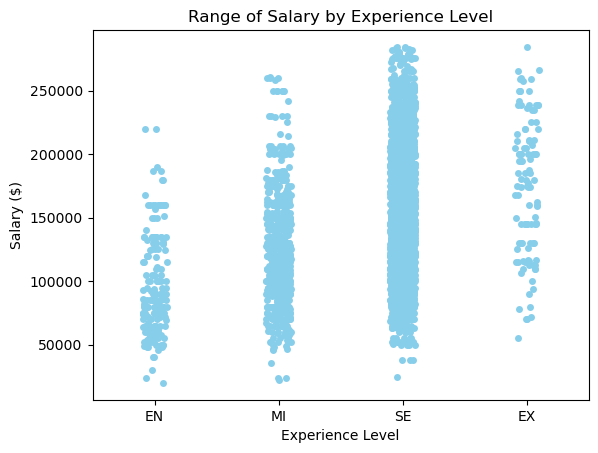

In [29]:
sns.stripplot(x="experience_level", y="salary", data=data_top_4, order=["EN", "MI", "SE", "EX"], color="skyblue")
plt.title("Range of Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary ($)")
plt.savefig("Output/fig1.png")

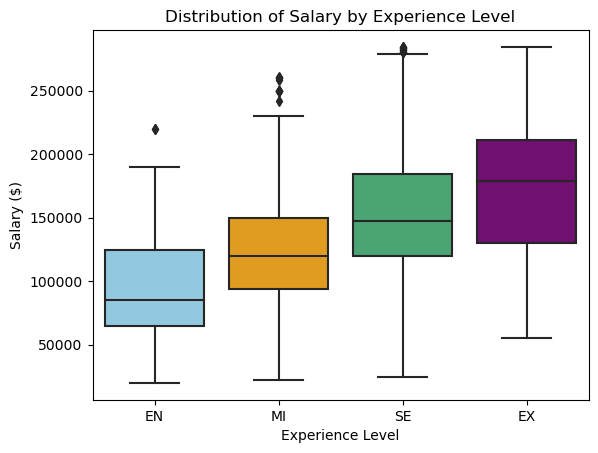

In [8]:
palette=["skyblue", "orange", "mediumseagreen", "purple"]
sns.boxplot(x="experience_level", y="salary", data=data_top_4, order=["EN", "MI", "SE", "EX"], palette=palette)
plt.title("Distribution of Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary ($)")
plt.savefig("Output/fig2.png")

In [9]:
# get salary range for each job title by experience level
data_analyst_salary_min = data_analysts.groupby(["experience_level"])["salary"].min()
data_analyst_salary_max = data_analysts.groupby(["experience_level"])["salary"].max()
data_scientist_salary_min = data_scientists.groupby(["experience_level"])["salary"].min()
data_scientist_salary_max = data_scientists.groupby(["experience_level"])["salary"].max()
data_engineer_salary_min = data_engineers.groupby(["experience_level"])["salary"].min()
data_engineer_salary_max = data_engineers.groupby(["experience_level"])["salary"].max()
machine_learning_engineer_salary_min = machine_learning_engineers.groupby(["experience_level"])["salary"].min()
machine_learning_engineer_salary_max = machine_learning_engineers.groupby(["experience_level"])["salary"].max()

salary_ranges = pd.DataFrame({"Data Analyst minimum": data_analyst_salary_min,
                             "Data Analyst maximum": data_analyst_salary_max,
                             "Data Scientist minimum": data_scientist_salary_min,
                             "Data Scientist maximum": data_scientist_salary_max,
                             "Data Engineer minimum": data_engineer_salary_min,
                             "Data Engineer maximum": data_engineer_salary_max,
                             "ML Engineer minimum": machine_learning_engineer_salary_min,
                             "ML Engineer maximum": machine_learning_engineer_salary_max})
salary_ranges = salary_ranges.reindex(["EN", "MI", "SE", "EX"])
salary_ranges

,Data Analyst minimum,Data Analyst maximum,Data Scientist minimum,Data Scientist maximum,Data Engineer minimum,Data Engineer maximum,ML Engineer minimum,ML Engineer maximum
experience_level,,,,,,,,
EN,20000,150000,40000,190000,52500,220000,81000,250000
MI,36000,216200,45760,260600,22000,260000,87000,300000
SE,51962,216200,38000,285800,25000,283780,85000,331640
EX,55000,180000,78000,258750,71908,284000,145000,295500


In [10]:
# get average for each experience level in each job title
avg_data_engineer_salaries = data_engineers.groupby(["experience_level"])["salary"].mean()
avg_data_scientist_salaries = data_scientists.groupby(["experience_level"])["salary"].mean()
avg_data_analyst_salaries = data_analysts.groupby(["experience_level"])["salary"].mean()
avg_machine_learning_engineer_salaries = machine_learning_engineers.groupby(["experience_level"])["salary"].mean()

In [11]:
avg_salaries_by_experience_level = pd.DataFrame({"Data Analyst": avg_data_analyst_salaries,
                                            "Data Scientist": avg_data_scientist_salaries,
                                            "Data Engineer": avg_data_engineer_salaries,
                                            "ML Engineer": avg_machine_learning_engineer_salaries})

avg_salaries_by_experience_level = avg_salaries_by_experience_level.reindex(["EN", "MI", "SE", "EX"])
avg_salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,ML Engineer
experience_level,,,,
EN,75685.428571,106415.886364,109101.880597,139916.454545
MI,103622.379913,136249.036145,129740.720000,168484.183333
SE,119998.592330,167551.901840,156680.738880,194317.566558
EX,107000.000000,180481.818182,181023.461538,190950.000000


In [52]:
def plot_avg_salaries(job_title):
    avg_salaries_by_experience_level[job_title].plot(kind="bar", title=f"Average Salary by Experience Level: {job_title}",
                                                     ylabel="Average Salary ($)", xlabel="Experience Level", color="skyblue")
    plt.tight_layout()
    plt.savefig(f"../Output/{job_title}.png")
    plt.show()

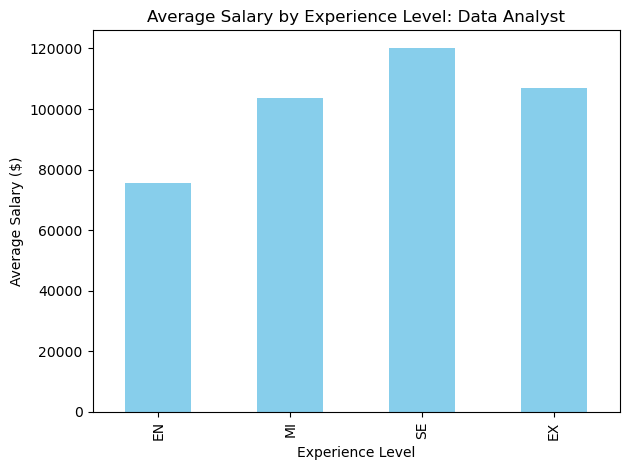

In [53]:
plot_avg_salaries("Data Analyst")

In [13]:
# get value counts for data analyst experience levels to show reason for discrepancy
data_analysts["experience_level"].value_counts()

experience_level
SE    704
MI    229
EN     70
EX     10
Name: count, dtype: int64

In [17]:
# get value counts for MLE experience levels to show reason for discrepancy
machine_learning_engineers["experience_level"].value_counts()

experience_level
SE    616
MI     60
EN     11
EX      6
Name: count, dtype: int64

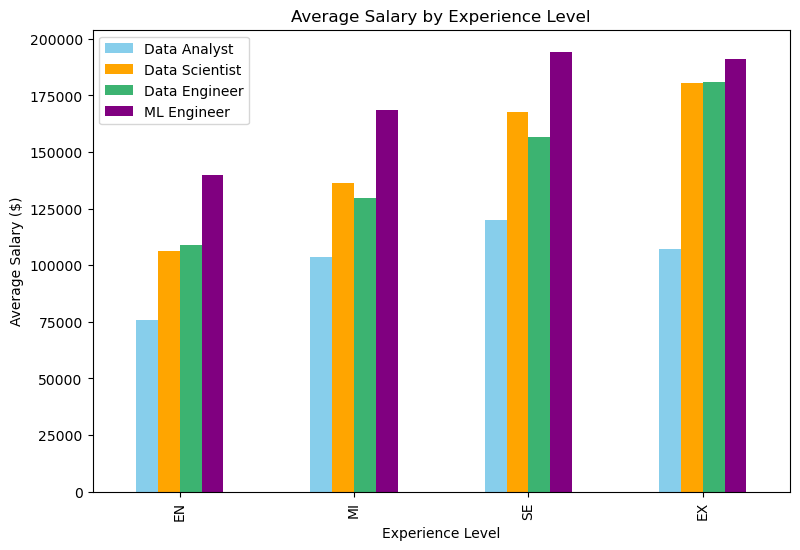

In [18]:
colors=["skyblue", "orange", "mediumseagreen", "purple"]
avg_salaries_by_experience_level.plot(kind="bar", title="Average Salary by Experience Level", 
                                      ylabel="Average Salary ($)", xlabel="Experience Level", figsize=(9,6), color=colors)
plt.savefig("Output/fig6.png")
plt.show()

In [ ]:
for col in avg_salaries_by_experience_level.columns:
    name = f"{str(col)} Salary Increase"
    avg_salaries_by_experience_level[name] = avg_salaries_by_experience_level[col].diff()

In [ ]:
avg_salaries_by_experience_level

In [ ]:
avg_salary_increase_DA = avg_salaries_by_experience_level["Data Analyst Salary Increase"].mean()
avg_salary_increase_DS = avg_salaries_by_experience_level["Data Scientist Salary Increase"].mean()
avg_salary_increase_DE = avg_salaries_by_experience_level["Data Engineer Salary Increase"].mean()
avg_salary_increase_MLE = avg_salaries_by_experience_level["ML Engineer Salary Increase"].mean()

avg_salary_increases = pd.DataFrame({"Data Analyst": [avg_salary_increase_DA],
                                        "Data Scientist": [avg_salary_increase_DS],
                                        "Data Engineer": [avg_salary_increase_DE],
                                        "ML Engineer": [avg_salary_increase_MLE]}).T
avg_salary_increases.plot(kind="bar", title="Average Salary Increase by Job Title", legend=False,figsize=(9,6), 
                          color="skyblue", rot=0)
plt.ylabel("Average Salary Increase ($)")
plt.savefig("Output/fig7.png")
plt.show()

In [ ]:
# print average salary increases for output
avg_salary_increase_DA = round(avg_salaries_by_experience_level["Data Analyst Salary Increase"].mean(),2)
avg_salary_increase_DS = round(avg_salaries_by_experience_level["Data Scientist Salary Increase"].mean(),2)
avg_salary_increase_DE = round(avg_salaries_by_experience_level["Data Engineer Salary Increase"].mean(),2)
avg_salary_increase_MLE = round(avg_salaries_by_experience_level["ML Engineer Salary Increase"].mean(),2)

print(f"Data Analysts show an average salary increase of ${avg_salary_increase_DA}.")
print(f"Data Scientists show an average salary increase of ${avg_salary_increase_DS}.")
print(f"Data Engineers show an average salary increase of ${avg_salary_increase_DE}.")
print(f"Machine Learning Engineers show an average salary increase of ${avg_salary_increase_MLE}.")

In [ ]:
# format salary ranges df for output
salary_ranges["Data Analyst minimum"] = salary_ranges["Data Analyst minimum"].map("${:}".format)
salary_ranges["Data Analyst maximum"] = salary_ranges["Data Analyst maximum"].map("${:}".format)
salary_ranges["Data Scientist minimum"] = salary_ranges["Data Scientist minimum"].map("${:}".format)
salary_ranges["Data Scientist maximum"] = salary_ranges["Data Scientist maximum"].map("${:}".format)
salary_ranges["Data Engineer minimum"] = salary_ranges["Data Engineer minimum"].map("${:}".format)
salary_ranges["Data Engineer maximum"] = salary_ranges["Data Engineer maximum"].map("${:}".format)
salary_ranges["ML Engineer minimum"] = salary_ranges["ML Engineer minimum"].map("${:}".format)
salary_ranges["ML Engineer maximum"] = salary_ranges["ML Engineer maximum"].map("${:}".format)
salary_ranges

In [ ]:
# format avg salaries df for output
avg_salaries_by_experience_level["Data Analyst"] = avg_salaries_by_experience_level["Data Analyst"].map("${:,.2f}".format)
avg_salaries_by_experience_level["Data Scientist"] = avg_salaries_by_experience_level["Data Scientist"].map("${:,.2f}".format)
avg_salaries_by_experience_level["Data Engineer"] = avg_salaries_by_experience_level["Data Engineer"].map("${:,.2f}".format)
avg_salaries_by_experience_level["ML Engineer"] = avg_salaries_by_experience_level["ML Engineer"].map("${:,.2f}".format)
avg_salaries_by_experience_level["Data Analyst Salary Increase"] = avg_salaries_by_experience_level["Data Analyst Salary Increase"].map("${:,.2f}".format)
avg_salaries_by_experience_level["Data Scientist Salary Increase"] = avg_salaries_by_experience_level["Data Scientist Salary Increase"].map("${:,.2f}".format)
avg_salaries_by_experience_level["Data Engineer Salary Increase"] = avg_salaries_by_experience_level["Data Engineer Salary Increase"].map("${:,.2f}".format)
avg_salaries_by_experience_level["ML Engineer Salary Increase"] = avg_salaries_by_experience_level["ML Engineer Salary Increase"].map("${:,.2f}".format)
avg_salaries_by_experience_level